**OBS: Fiz todos os comentários em inglês para dar uma testada nos meus conhecimentos**

**Selfmade Nearest Centroid Class**

In [92]:
class NearestCentroidScratch():
  def __init__(self, metric='eucledian'):
    self.metric = metric
    self.centroids_ = np.array([])
  
  def fit(self, X, y): #IMPLEMENTED

    #np.mean -> average value from a certain array

    #axis=0 -> first column
    #axis=1 -> second column

    c1 = np.mean(X[y==0], axis=0)  #X[y==1] -> finds all data where y=1
    c2 = np.mean(X[y==1], axis=0) #X[y==2] -> finds all data where y=2
    
    print('Centroid 1 =', c1)
    print('Centroid 2 =', c2)

    self.centroids_ = np.array([c1,c2])

  def predict(self, X): #IMPLEMENTED
    y_pred = np.empty([len(X)], dtype=int)
    for i in range(len(X)): #from 0 to X_test[] lenght
      if(np.linalg.norm(self.centroids_[0] - X[i]) < np.linalg.norm(self.centroids_[1] - X[i])): #Euclidian Distance
        y_pred[i] = 0
      else:
        y_pred[i] = 1
    
    return y_pred #returns prediction
  
  def score(self, X, y):
    aux=0
    for i in range(len(X)): #from 0 to X_test[] lenght
      if(X[i] == y[i]):
        aux += 1
    return aux/len(X)
  

**Importing Pandas library and data**

In [93]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados&colunas.csv')
df.head()

,Height[m],Weight[Kg],HDI,Population[Mi],Region
0,1.62,56.0,0.632,164.68,eastern
1,1.65,65.0,0.645,1380.00,eastern
2,1.66,59.0,0.733,25.77,eastern
3,1.68,71.5,0.810,32.36,eastern
4,1.68,74.7,0.737,3.27,eastern


**Setting 'eastern' as 0 and 'western' as 1**

In [94]:
d = {'eastern': 0,'western': 1}

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados&colunas.csv')
df['Region'] = df['Region'].map(d)
df.head()

,Height[m],Weight[Kg],HDI,Population[Mi],Region
0,1.62,56.0,0.632,164.68,0
1,1.65,65.0,0.645,1380.00,0
2,1.66,59.0,0.733,25.77,0
3,1.68,71.5,0.810,32.36,0
4,1.68,74.7,0.737,3.27,0


**Setting matrix Y with labels ('eastern' or 'western')**

In [95]:
y = df['Region'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

**Setting matrix X with features**


In [96]:
X = df.iloc[:,:4].values #all rows but only columns from 0 to 3
X[:5] #ispection of first 5 rows

array([[1.6200e+00, 5.6000e+01, 6.3200e-01, 1.6468e+02],
       [1.6500e+00, 6.5000e+01, 6.4500e-01, 1.3800e+03],
       [1.6600e+00, 5.9000e+01, 7.3300e-01, 2.5770e+01],
       [1.6800e+00, 7.1500e+01, 8.1000e-01, 3.2360e+01],
       [1.6800e+00, 7.4700e+01, 7.3700e-01, 3.2700e+00]])

**Installing MLXtend and Showing Graphs**

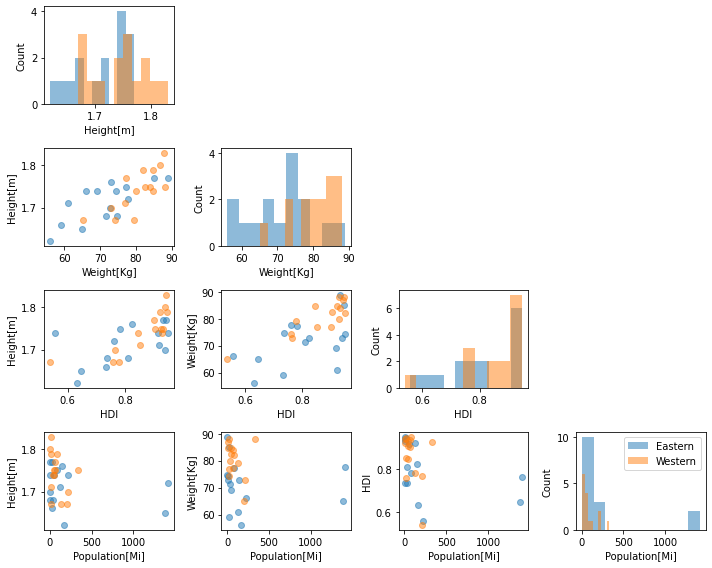

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

names = df.columns[:4]

fig, axes = scatterplotmatrix(X[y==0], figsize=(10,8), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig, axes), alpha=0.5, names=names)

plt.tight_layout()
plt.legend(labels=['Eastern', 'Western'])
plt.show()

**Splitting Dataset into Train and Test**

In [119]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=0, stratify=y)

**Normalizing X_train and X_test**

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

**Calculating Centroids Using Nearest Centroid Class**

In [121]:
clf = NearestCentroidScratch()
clf.fit(X_train_std, y_train)

print('')
clf.centroids_

Centroid 1 = [-0.25344453 -0.43477926 -0.20007696  0.25395709]
Centroid 2 = [ 0.25344453  0.43477926  0.20007696 -0.25395709]



array([[-0.25344453, -0.43477926, -0.20007696,  0.25395709],
       [ 0.25344453,  0.43477926,  0.20007696, -0.25395709]])

**Printing X_test_std and y_test**

In [122]:
print('X_test_std')
print(X_test_std)
print('\ny_test')
print(y_test)

X_test_std
[[ 0.584872   -0.38338691 -0.06331549 -0.15506779]
 [-0.7018464  -0.40599954  0.84408596 -0.51811977]
 [-2.41747093 -2.3054607  -1.59157057 -0.10647252]
 [ 0.15596587  0.40805524  0.772449   -0.43546894]
 [ 0.15596587  0.93945211  0.10383741 -0.41444987]
 [ 1.2282312   0.92814579  0.71673137 -0.50995577]
 [-1.3452056  -0.24771111 -0.58069351 -0.48756307]
 [-1.13075253 -0.55298166 -0.17475076 -0.44941254]]

y_test
[0 0 0 1 1 1 1 0]


**Printing Prediction and Test Results**

In [123]:
y_pred = clf.predict(X_test_std)

print('y_test:',y_test)
print('\ny_pred:',y_pred)

y_test: [0 0 0 1 1 1 1 0]

y_pred: [1 0 0 1 1 1 0 0]


**Printing Nearest Centroid from Scratch Accuracy**

In [124]:
clf.score(y_pred, y_test)

0.75